# Imports

In [6]:
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 10.6 MB/s eta 0:00:0000:0100:01
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil.parser import parse

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder

# Data Loading 

In [8]:
warehouse_df = pd.read_csv('data/Cloud Warehouse Compersion Chart.csv')
expense_df = pd.read_csv('data/Expense IIGF.csv')
may_df = pd.read_csv('data/May-2022.csv')
pl_df = pd.read_csv('data/P  L March 2021.csv')
sales_df = pd.read_csv('data/Sale Report.csv')
int_sales_df = pd.read_csv('data/International sale Report.csv')
amazon = pd.read_csv('data/Amazon Sale Report.csv')

# CLOUD WAREHOUSE COMPERSION CHART (EXPLORED IN EXCEL)

# INTERNATIONAL SALE REPORT

In [ ]:
int_sales_df = pd.read_csv('data/International sale Report.csv')

In [ ]:
int_sales_df.head()

,index,Sale_Date,Sale_Month,Customer_Name,Product_Style,Product_SKU,Product_Size,Quantity_Purchased,Price_per_Unit,Gross_Amount
0,0,6/5/2021,21-Jun,REVATHY LOGANATHAN,MEN5004,MEN5004-KR-L,L,1,616.56,617
1,1,6/5/2021,21-Jun,REVATHY LOGANATHAN,MEN5004,MEN5004-KR-XL,XL,1,616.56,617
2,2,6/5/2021,21-Jun,REVATHY LOGANATHAN,MEN5004,MEN5004-KR-XXL,XXL,1,616.56,617
3,3,6/5/2021,21-Jun,REVATHY LOGANATHAN,MEN5009,MEN5009-KR-L,L,1,616.56,617
4,4,6/5/2021,21-Jun,REVATHY LOGANATHAN,MEN5011,MEN5011-KR-L,L,1,616.56,617


In [ ]:
def is_date(string):
    try:
        if pd.isna(string):
            return False
        parse(str(string))
        return True
    except (ValueError, TypeError):
        return False

# Counting date and non-date values
date_count = int_sales_df['Sale_Date'].apply(is_date).sum()
non_date_count = len(int_sales_df) - date_count

print(f"Number of date values: {date_count}")
print(f"Number of non-date values: {non_date_count}")
print("Length of the DataFrame:", len(int_sales_df))

Number of date values: 18643
Number of non-date values: 18789
Length of the DataFrame: 37432


In [ ]:
# Reading each section of the dataset seperately

sales_data = pd.read_csv('data/International sale Report.csv', header=None, nrows=18664, skiprows=1)
sales_data.columns = ['index', 'Sale_Date', 'Sale_Month', 'Customer_Name', 'Product_Style', 'Product_SKU', 'Product_Size', 'Quantity_Purchased', 'Price_per_Unit', 'Gross_Amount']
sales_data = sales_data.dropna(axis=1, how='all')

sku_data = pd.read_csv('data/International sale Report.csv', header=None, skiprows=18637, nrows=22, usecols=range(1,2))
sku_data.columns = ['SKU']
sku_data = sku_data.dropna(axis=1, how='all')

style_stock_data = pd.read_csv('data/International sale Report.csv', header=None, skiprows=18662, nrows=1014, usecols=range(1,3))
style_stock_data.columns = ['Style', 'Stock']
style_stock_data = style_stock_data.dropna(axis=1, how='all')

detailed_sales_data = pd.read_csv('data/International sale Report.csv', header=None, skiprows=19678, usecols=range(1,10))
detailed_sales_data.columns = ['CUSTOMER', 'DATE', 'Months', 'Style', 'SKU', 'PCS', 'RATE', 'GROSS AMT', 'Stock']
detailed_sales_data = detailed_sales_data.dropna(axis=1, how='all')

In [ ]:
sales_data

,index,Sale_Date,Sale_Month,Customer_Name,Product_Style,Product_SKU,Product_Size,Quantity_Purchased,Price_per_Unit,Gross_Amount
0,0,6/5/2021,21-Jun,REVATHY LOGANATHAN,MEN5004,MEN5004-KR-L,L,1.0,616.56,617.0
1,1,6/5/2021,21-Jun,REVATHY LOGANATHAN,MEN5004,MEN5004-KR-XL,XL,1.0,616.56,617.0
2,2,6/5/2021,21-Jun,REVATHY LOGANATHAN,MEN5004,MEN5004-KR-XXL,XXL,1.0,616.56,617.0
3,3,6/5/2021,21-Jun,REVATHY LOGANATHAN,MEN5009,MEN5009-KR-L,L,1.0,616.56,617.0
4,4,6/5/2021,21-Jun,REVATHY LOGANATHAN,MEN5011,MEN5011-KR-L,L,1.0,616.56,617.0
...,...,...,...,...,...,...,...,...,...,...
18659,18659,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18660,18660,Style,Stock,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18661,18661,MEN5004,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18662,18662,MEN5009,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
sku_data

,SKU
0,JNE3826
1,JNE3827
2,JNE3828
3,JNE3853
4,JNE3855
5,JNE3858
6,JNE3829
7,JNE3830
8,JNE3849
9,JNE3852


In [ ]:
style_stock_data

,Style,Stock
0,MEN5004,43
1,MEN5009,55
2,MEN5011,53
3,MEN5025,34
4,MEN5015,119
...,...,...
1009,J0419,313
1010,JNE3905,299
1011,23-Jan,0
1012,J0391,270


In [ ]:
detailed_sales_data

,CUSTOMER,DATE,Months,Style,SKU,PCS,RATE,GROSS AMT,Stock
0,REVATHY LOGANATHAN,6/5/2021,21-Jun,MEN5004,MEN5004-KR-XL,1,616.56,617,4
1,REVATHY LOGANATHAN,6/5/2021,21-Jun,MEN5004,MEN5004-KR-XXL,1,616.56,617,6
2,REVATHY LOGANATHAN,6/5/2021,21-Jun,MEN5009,MEN5009-KR-L,1,616.56,617,6
3,REVATHY LOGANATHAN,6/5/2021,21-Jun,MEN5011,MEN5011-KR-L,1,616.56,617,11
4,REVATHY LOGANATHAN,6/5/2021,21-Jun,MEN5025,MEN5025-KR-L,1,649.03,649,6
...,...,...,...,...,...,...,...,...,...
17750,AVIN,3/31/2022,22-Mar,PJNE3423,PJNE3423-KR-4XL,1,537.50,538,4
17751,AVIN,3/31/2022,22-Mar,PJNE3404,PJNE3404-KR-4XL,1,500.00,500,5
17752,AVIN,3/31/2022,22-Mar,PJNE3423,PJNE3423-KR-4XL,1,537.50,538,4
17753,AVIN,3/31/2022,22-Mar,SET290,SET290-KR-DPT-M,1,812.50,812,7


In [ ]:
ssales_data = sales_data.copy()

In [ ]:
sales_data=ssales_data.copy()

In [ ]:
sales_data

,Sale_Date,Sale_Month,Customer_Name,Product_Style,Product_SKU,Product_Size,Quantity_Purchased,Price_per_Unit,Gross_Amount
0,05-06-2021,2021-06,REVATHY LOGANATHAN,MEN5004,MEN5004-KR-L,L,1.0,616.56,617.0
1,05-06-2021,2021-06,REVATHY LOGANATHAN,MEN5004,MEN5004-KR-XL,XL,1.0,616.56,617.0
2,05-06-2021,2021-06,REVATHY LOGANATHAN,MEN5004,MEN5004-KR-XXL,XXL,1.0,616.56,617.0
3,05-06-2021,2021-06,REVATHY LOGANATHAN,MEN5009,MEN5009-KR-L,L,1.0,616.56,617.0
4,05-06-2021,2021-06,REVATHY LOGANATHAN,MEN5011,MEN5011-KR-L,L,1.0,616.56,617.0
...,...,...,...,...,...,...,...,...,...
18630,30-04-2022,2022-04,Rino Sandaran,J0280,NaN,S,1.0,1812.50,1812.5
18631,30-04-2022,2022-04,Rino Sandaran,SET350,NaN,M,1.0,1512.50,1512.5
18632,30-04-2022,2022-04,Rino Sandaran,SET350,NaN,L,1.0,1512.50,1512.5
18633,30-04-2022,2022-04,Rino Sandaran,J0242,NaN,XXXL,1.0,1312.50,1312.5


In [ ]:
# Handling missing values for sales data
sales_data.drop(columns=['index', 'Category'], errors='ignore', inplace=True)
sales_data['Sale_Date'] = pd.to_datetime(sales_data['Sale_Date'], format='%m/%d/%Y', errors='coerce').dt.strftime('%d-%m-%Y')
sales_data['Sale_Month'] = pd.to_datetime(sales_data['Sale_Month'], format='%y-%b', errors='coerce').dt.strftime('%Y-%m')
numeric_cols = ['Quantity_Purchased', 'Gross_Amount', 'Price_per_Unit']
sales_data[numeric_cols] = sales_data[numeric_cols].apply(pd.to_numeric, errors='coerce')
sales_data['Customer_Name'] = sales_data['Customer_Name'].str.replace('MR.', 'MR ', regex=False).str.strip()
sales_data.dropna(subset=['Sale_Month', 'Product_Size', 'Product_Style', 'Customer_Name', 'Quantity_Purchased', 'Price_per_Unit', 'Gross_Amount'], inplace=True) # Dropping rows with missing values since theyt are less than 1% of the data
sales_data['Product_SKU'].fillna('Unknown')

# Handling missing values for style-stock data 
style_stock_data['Stock'] = pd.to_numeric(style_stock_data['Stock'], errors='coerce').fillna(0)

# Handling missing values for detailed sales data
detailed_numeric_cols = ['PCS', 'RATE', 'GROSS AMT']
detailed_sales_data[detailed_numeric_cols] = detailed_sales_data[detailed_numeric_cols].apply(pd.to_numeric, errors='coerce').fillna(0)

In [ ]:
# Sales Trend Analysis
total_sales = sales_data['Quantity_Purchased'].sum()
daily_sales = sales_data.groupby('Sale_Date')['Quantity_Purchased'].sum()
monthly_sales = sales_data.groupby('Sale_Month')['Quantity_Purchased'].sum()

# Top Selling Products
top_products = sales_data.groupby('Product_SKU')['Quantity_Purchased'].sum().sort_values().head(10)

# Customer Analysis
top_customers = sales_data.groupby('Customer_Name')['Gross_Amount'].sum().sort_values().head(5)

# Product Category Performance
sales_data['Category'] = sales_data['Product_SKU']
category_sales = sales_data.groupby('Category')['Quantity_Purchased'].sum().sort_values()

# Size Distribution
size_distribution = sales_data.groupby('Product_Size')['Quantity_Purchased'].sum().sort_values()

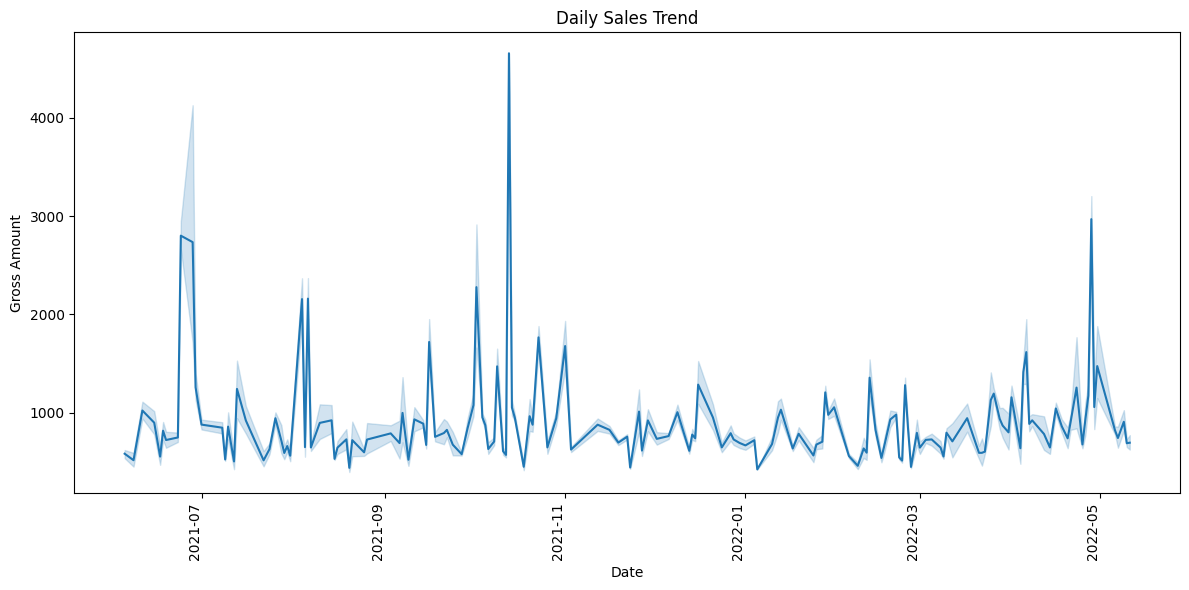

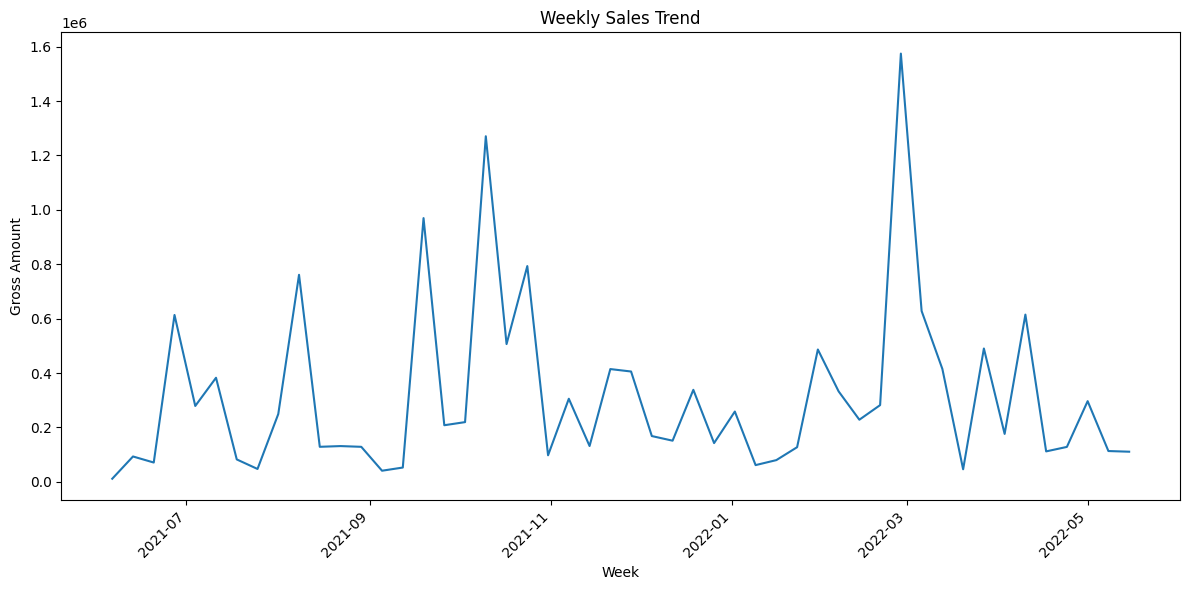

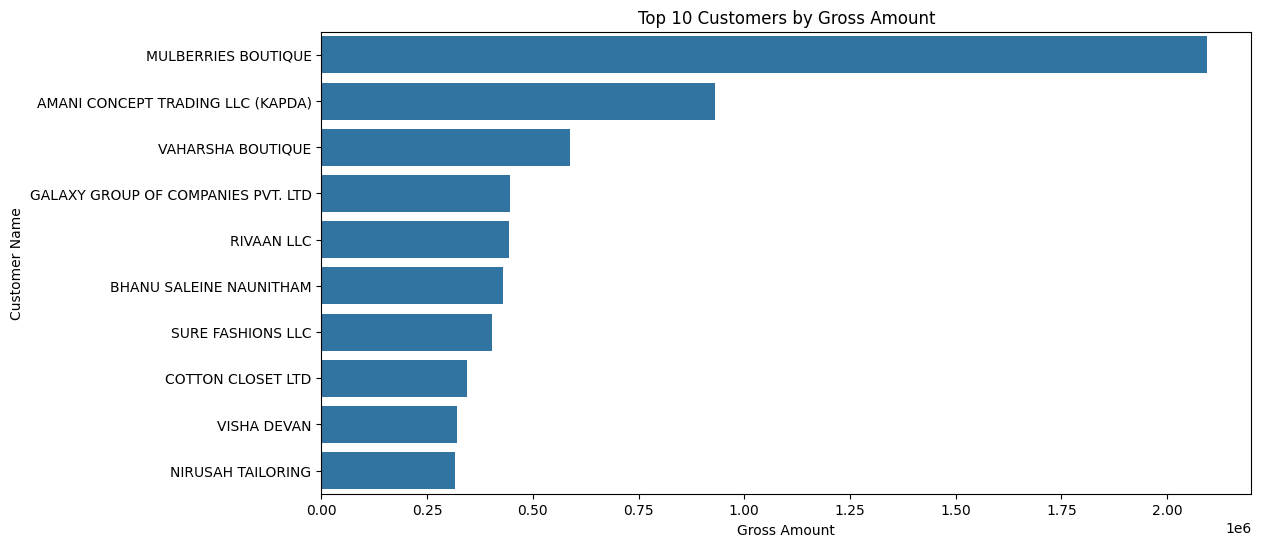

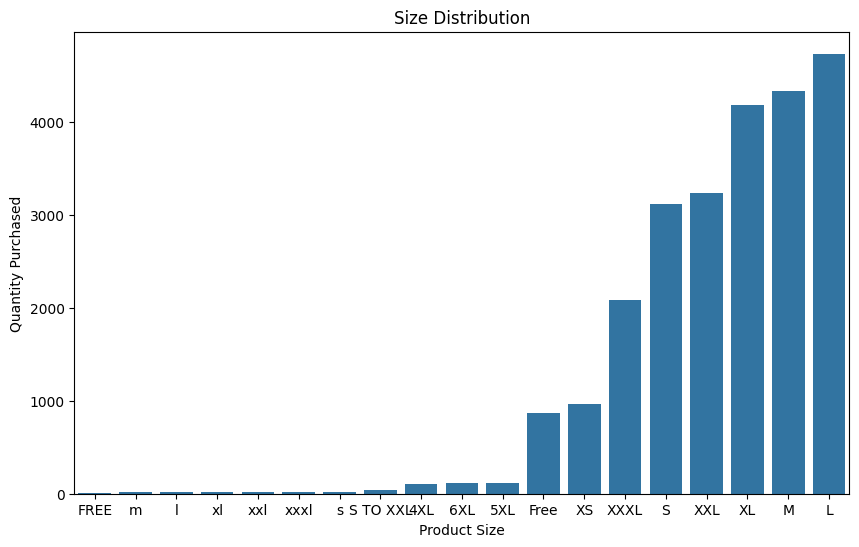

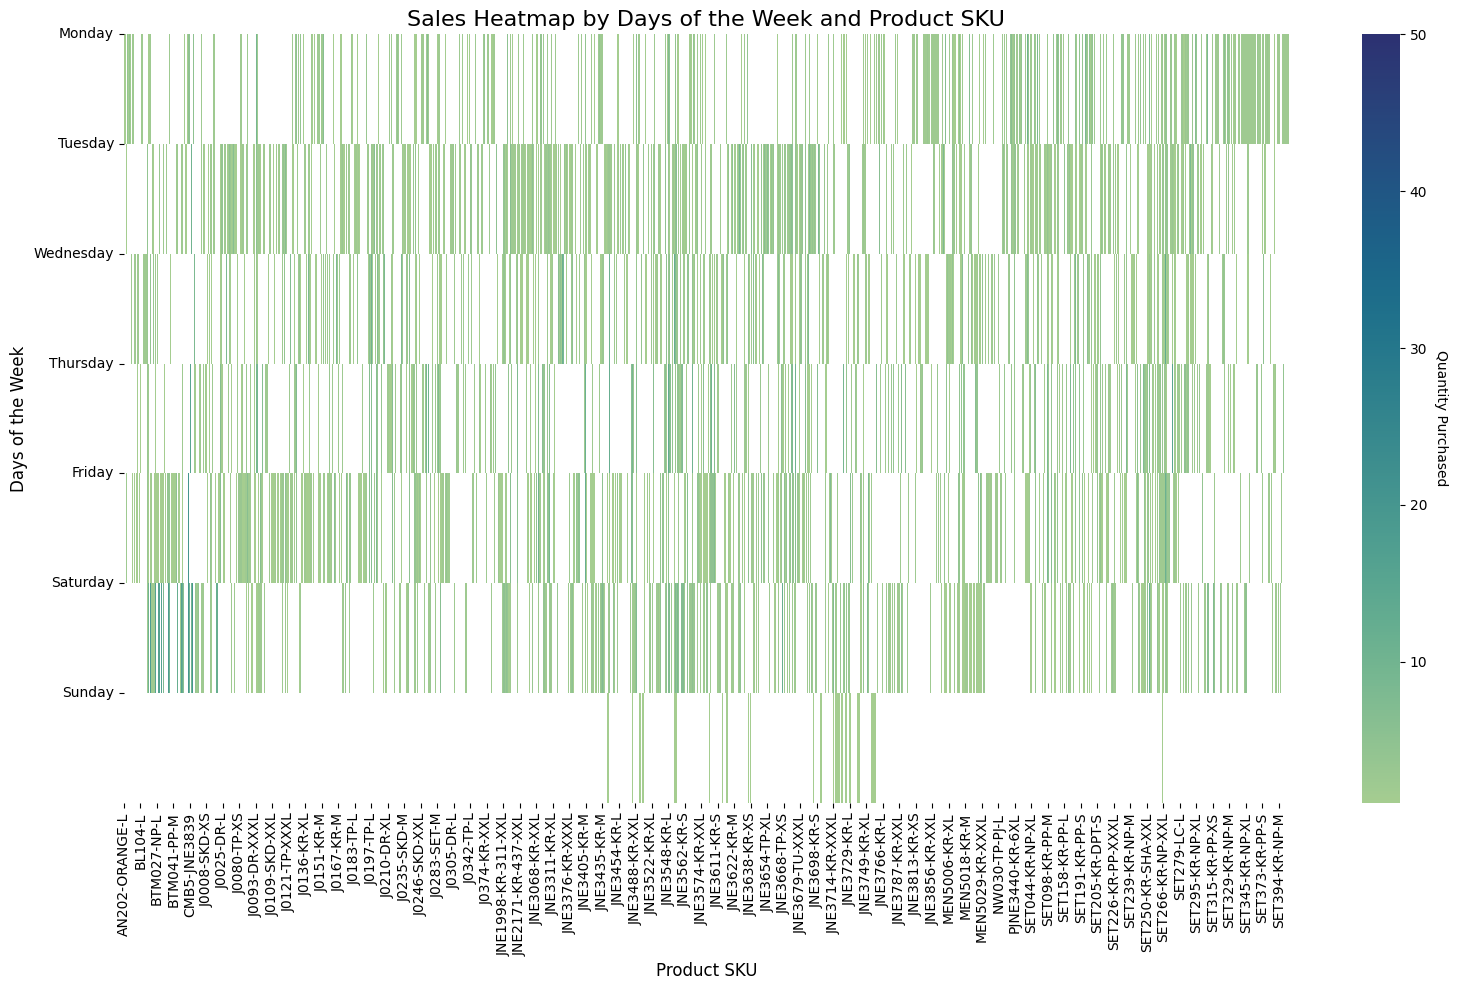

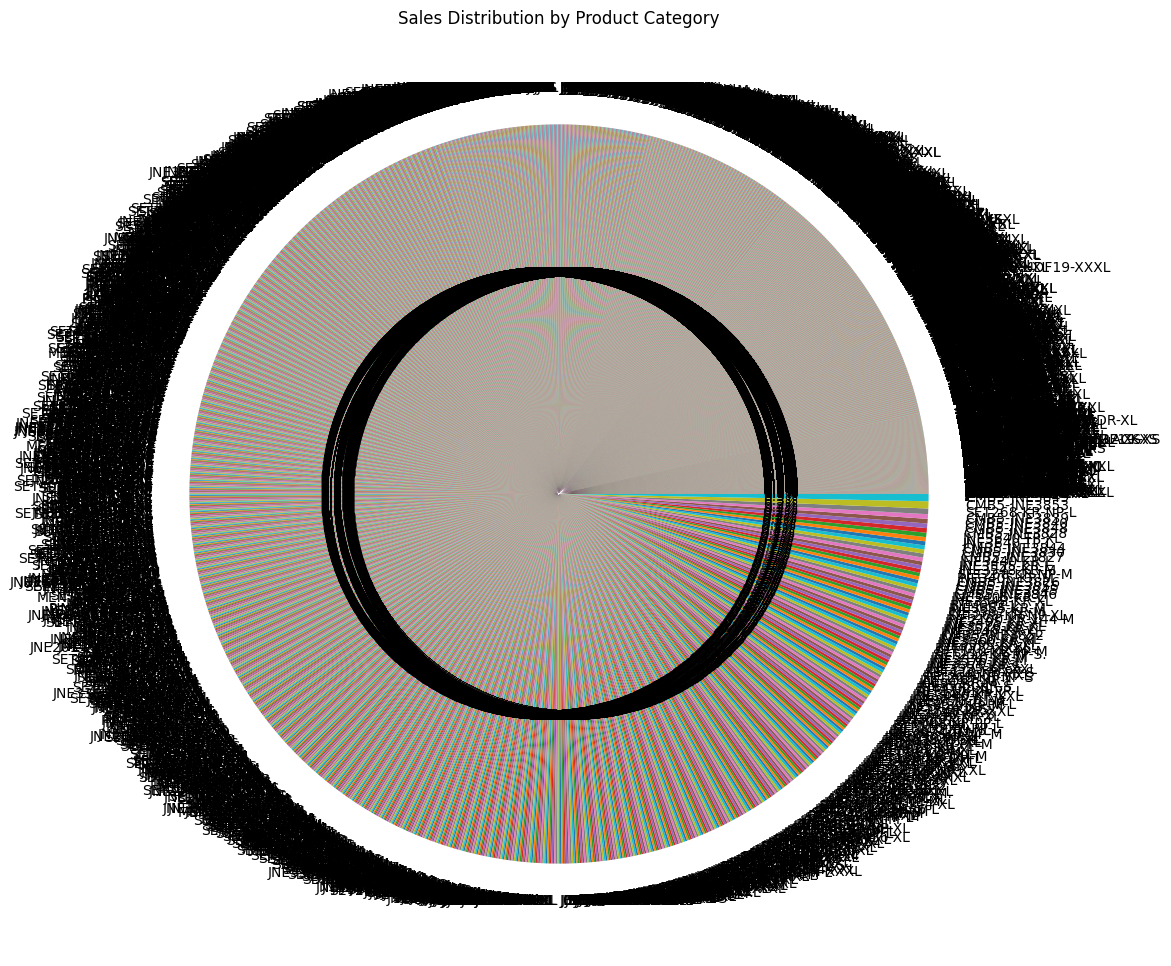

Total sales: $15,768,162.19
Average order value: $846.16
Best selling month: 2021-10 ($2,865,134.00)
Worst selling month: 2022-05 ($224,483.44)


In [ ]:

# Sales Trend Analysis
plt.figure(figsize=(12, 6))
sns.lineplot(x='Sale_Date', y='Gross_Amount', data=sales_data)
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Gross Amount')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

# Weekly Sales Trend
weekly_sales = sales_data.resample('W', on='Sale_Date').sum(numeric_only=True)
plt.figure(figsize=(12, 6))
sns.lineplot(x=weekly_sales.index, y=weekly_sales['Gross_Amount'])
plt.title('Weekly Sales Trend')
plt.xlabel('Week')
plt.ylabel('Gross Amount')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Customer Analysis
top_customers = sales_data.groupby('Customer_Name')['Gross_Amount'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_customers.values, y=top_customers.index)
plt.title('Top 10 Customers by Gross Amount')
plt.xlabel('Gross Amount')
plt.ylabel('Customer Name')
plt.show()

# Size Distribution
size_distribution = sales_data.groupby('Product_Size')['Quantity_Purchased'].sum().sort_values()
plt.figure(figsize=(10, 6))
sns.barplot(x=size_distribution.index, y=size_distribution.values)
plt.title('Size Distribution')
plt.xlabel('Product Size')
plt.ylabel('Quantity Purchased')
plt.show()

# Sales Heatmap by Day of Week and Product_SKU
pivot = sales_data.pivot_table(values='Quantity_Purchased', index=pd.to_datetime(sales_data['Sale_Date'],format='%d-%m-%Y').dt.dayofweek, columns='Product_SKU', aggfunc='sum')
plt.figure(figsize=(16, 10))
heatmap = sns.heatmap(pivot, cmap='crest', annot=False)
plt.title('Sales Heatmap by Days of the Week and Product SKU', fontsize=16)
plt.xlabel('Product SKU', fontsize=12)
plt.ylabel('Days of the Week', fontsize=12)
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.yticks(range(7), day_names, rotation=0)
plt.xticks(rotation=90)
cbar = heatmap.collections[0].colorbar
cbar.set_label('Quantity Purchased', rotation=270, labelpad=15)
plt.tight_layout()
plt.show()

# Sales Distribution by Product Category(SKU)
plt.figure(figsize=(20, 12))
category_sales.plot(kind='pie', autopct='%1.1f%%', title='Sales Distribution by Product Category')
plt.show()

# Additional Insights
monthly_sales = sales_data.groupby('Sale_Month')['Gross_Amount'].sum()
print(f"Total sales: ${sales_data['Gross_Amount'].sum():,.2f}")
print(f"Average order value: ${sales_data['Gross_Amount'].mean():,.2f}")
print(f"Best selling month: {monthly_sales.idxmax()} (${monthly_sales.max():,.2f})")
print(f"Worst selling month: {monthly_sales.idxmin()} (${monthly_sales.min():,.2f})")

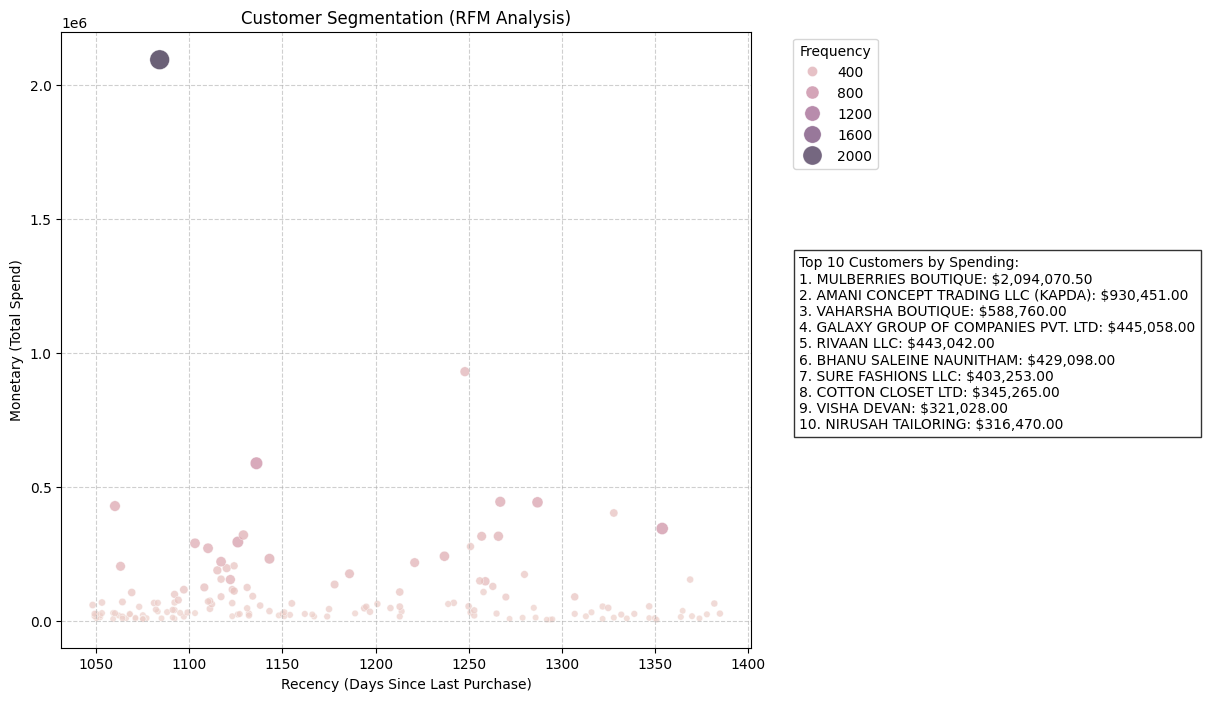

In [ ]:
# Compute RFM metrics
rfm = sales_data.groupby('Customer_Name').agg({
    'Sale_Date': lambda x: (pd.to_datetime('today') - pd.to_datetime(x.max())).days,  # Recency
    'Customer_Name': 'count',  # Frequency
    'Gross_Amount': 'sum'  # Monetary
}).rename(columns={'Sale_Date': 'Recency', 'Customer_Name': 'Frequency', 'Gross_Amount': 'Monetary'})

rfm['Recency'] = rfm['Recency'].astype(int)

# Identify Top 10 Customers by Monetary Value (Spending)
top_customers = rfm.sort_values(by='Monetary', ascending=False).head(10)

# Create figure and axes
fig, ax = plt.subplots(figsize=(12, 8))

# Plot Scatter
scatter = sns.scatterplot(data=rfm, x='Recency', y='Monetary', hue='Frequency', size='Frequency', sizes=(20, 200), alpha=0.7, ax=ax)

# Add gridlines
ax.grid(True, linestyle='--', alpha=0.6)

# Titles and Labels
ax.set_title("Customer Segmentation (RFM Analysis)")
ax.set_xlabel("Recency (Days Since Last Purchase)")
ax.set_ylabel("Monetary (Total Spend)")

# Move the legend outside the plot
handles, labels = ax.get_legend_handles_labels()
legend = ax.legend(handles, labels, title="Frequency", bbox_to_anchor=(1.05, 1), loc='upper left')

# Create a second text box below the legend
top_text = "\n".join([f"{i+1}. {name}: ${value:,.2f}" for i, (name, value) in enumerate(top_customers['Monetary'].items())])

# Adjust y-position to align it just below the legend
fig.text(0.74, 0.6, f"Top 10 Customers by Spending:\n{top_text}", 
         fontsize=10, bbox=dict(facecolor='white', alpha=0.8), va='top')

# Adjust layout to make space for the legend and text box
plt.subplots_adjust(right=0.7)

# Show the plot
plt.show()

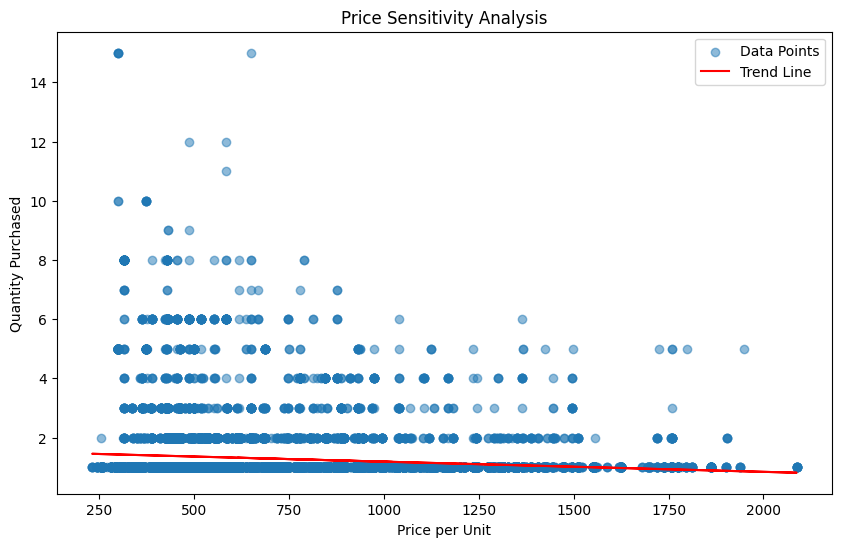

In [ ]:
x = sales_data['Price_per_Unit']
y = sales_data['Quantity_Purchased']
# Fit a linear regression model (y = mx + c)
m, c = np.polyfit(x, y, 1)
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5, label="Data Points")
plt.plot(x, m*x + c, color='red', label="Trend Line")  # Plot the fitted line
plt.title("Price Sensitivity Analysis")
plt.xlabel("Price per Unit")
plt.ylabel("Quantity Purchased")
plt.legend()
plt.show()

# May 2022 Dataset

Cleaning

In [35]:
may_df.replace('Nill', np.nan, inplace=True)
may_df.replace('#VALUE!', np.nan, inplace=True)
may_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   index             1330 non-null   int64 
 1   Product_SKU       1330 non-null   object
 2   Product_Style_ID  1330 non-null   object
 3   Product_Catalog   1257 non-null   object
 4   Product_Category  1257 non-null   object
 5   Product_Weight    1257 non-null   object
 6   Transfer_Price    1324 non-null   object
 7   Old_MRP           1293 non-null   object
 8   Final_Old_MRP     1293 non-null   object
 9   Ajio_MRP          1293 non-null   object
 10  Amazon_MRP        1293 non-null   object
 11  Amazon_FBA_MRP    1293 non-null   object
 12  Flipkart_MRP      1293 non-null   object
 13  Limeroad_MRP      1293 non-null   object
 14  Myntra_MRP        1299 non-null   object
 15  Paytm_MRP         1293 non-null   object
 16  Snapdeal_MRP      1293 non-null   object
dtypes: int64(1), o

Preprocessing

In [36]:
unique_Catalog = may_df['Product_Catalog'].unique()
Catalog_valuecount = may_df['Product_Catalog'].value_counts()
Catalog_nullcount = may_df['Product_Catalog'].isnull().sum()
print("Unique Product Catalog values:", unique_Catalog)
print(Catalog_valuecount)
print("Null values:",Catalog_nullcount)

Unique Product Catalog values: ['Moments' 'Colors-8' 'Breeze-4' 'Rozana' 'Colors-7' 'Mix' 'Surmaya'
 'Four Gems 2' nan]
Product_Catalog
Mix            830
Surmaya        192
Colors-8        48
Rozana          48
Colors-7        43
Moments         36
Breeze-4        36
Four Gems 2     24
Name: count, dtype: int64
Null values: 73


In [37]:
le_style = LabelEncoder()
le_catalog = LabelEncoder()

may_df['Product_Style_ID_encoded'] = le_style.fit_transform(may_df['Product_Style_ID'])
may_df['Product_Catalog_encoded'] = le_catalog.fit_transform(may_df['Product_Catalog'].astype(str))

train_data = may_df[may_df['Product_Catalog'].notnull()]
test_data = may_df[may_df['Product_Catalog'].isnull()]

if not train_data.empty and not test_data.empty:
    X_train = train_data[['Product_Style_ID_encoded']]
    y_train = train_data['Product_Catalog_encoded']
    X_test = test_data[['Product_Style_ID_encoded']]

    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train, y_train)

    predicted_catalogs = knn.predict(X_test)
    predicted_catalogs_decoded = le_catalog.inverse_transform(predicted_catalogs)

    may_df.loc[may_df['Product_Catalog'].isnull(), 'Product_Catalog'] = predicted_catalogs_decoded

In [38]:
Catalog_valuecount = may_df['Product_Catalog'].value_counts()
print(Catalog_valuecount)

Catalog_nullcount = may_df['Product_Catalog'].isnull().sum()
print("Null values:",Catalog_nullcount)

Product_Catalog
Mix            865
Surmaya        230
Colors-8        48
Rozana          48
Colors-7        43
Moments         36
Breeze-4        36
Four Gems 2     24
Name: count, dtype: int64
Null values: 0


In [39]:
unique_Category = may_df['Product_Category'].unique()
Category_valuecount = may_df['Product_Category'].value_counts()
Category_nullcount = may_df['Product_Category'].isnull().sum()
print("Unique Product Category values:", unique_Category)
print(Category_valuecount)
print("Null values:",Category_nullcount)

Unique Product Category values: ['Kurta' 'Kurta Set' 'Gown' 'Tops' nan]
Product_Category
Kurta        820
Kurta Set    360
Tops          45
Gown          32
Name: count, dtype: int64
Null values: 73


In [40]:
le_category = LabelEncoder()

may_df['Product_Category_encoded'] = le_category.fit_transform(may_df['Product_Category'].astype(str))

train_data = may_df[may_df['Product_Category'].notnull()]
test_data = may_df[may_df['Product_Category'].isnull()]

if not train_data.empty and not test_data.empty:
    X_train = train_data[['Product_Style_ID_encoded', 'Product_Catalog_encoded']]
    y_train = train_data['Product_Category_encoded']
    X_test = test_data[['Product_Style_ID_encoded', 'Product_Catalog_encoded']]

    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train, y_train)

    predicted_categories = knn.predict(X_test)
    predicted_categories_decoded = le_category.inverse_transform(predicted_categories)

    may_df.loc[may_df['Product_Category'].isnull(), 'Product_Category'] = predicted_categories_decoded

In [41]:
weight_mapping = {
    'Gown': 0.4,
    'Kurta Set': 0.4,
    'Kurta': 0.3,
    'Tops': 0.2
}

may_df['Product_Weight'] = may_df.apply(
    lambda row: weight_mapping[row['Product_Category']] if pd.isnull(row['Product_Weight']) and row['Product_Category'] in weight_mapping else row['Product_Weight'],
    axis=1
)

In [42]:
may_df['Transfer_Price'] = pd.to_numeric(may_df['Transfer_Price'], errors='coerce')
may_df['Old_MRP'] = pd.to_numeric(may_df['Old_MRP'], errors='coerce')
may_df['Final_Old_MRP'] =pd.to_numeric(may_df['Final_Old_MRP'], errors='coerce')
may_df['Ajio_MRP'] = pd.to_numeric(may_df['Ajio_MRP'], errors='coerce')
may_df['Amazon_MRP'] = pd.to_numeric(may_df['Amazon_MRP'], errors='coerce')
may_df['Amazon_FBA_MRP'] = pd.to_numeric(may_df['Amazon_FBA_MRP'], errors='coerce')
may_df['Flipkart_MRP'] = pd.to_numeric(may_df['Flipkart_MRP'], errors='coerce')
may_df['Limeroad_MRP'] = pd.to_numeric(may_df['Limeroad_MRP'], errors='coerce')
may_df['Myntra_MRP'] = pd.to_numeric(may_df['Myntra_MRP'], errors='coerce')
may_df['Paytm_MRP'] = pd.to_numeric(may_df['Paytm_MRP'], errors='coerce')
may_df['Snapdeal_MRP'] = pd.to_numeric(may_df['Snapdeal_MRP'], errors='coerce')
may_df['Product_Weight'] = pd.to_numeric(may_df['Product_Weight'], errors='coerce')

In [43]:
may_df['Product_SKU'] = may_df['Product_SKU'].astype(str)
may_df['Product_Style_ID'] = may_df['Product_Style_ID'].astype(str)
may_df['Product_Catalog'] = may_df['Product_Catalog'].astype(str)
may_df['Product_Category'] = may_df['Product_Category'].astype(str)

In [44]:
train_data = may_df[may_df['Transfer_Price'].notnull()]
test_data = may_df[may_df['Transfer_Price'].isnull()]

X_train = train_data[['Product_Style_ID_encoded', 'Product_Catalog_encoded', 'Product_Category_encoded']]
y_train = train_data['Transfer_Price']
X_test = test_data[['Product_Style_ID_encoded', 'Product_Catalog_encoded', 'Product_Category_encoded']]

knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)

predicted_transferprice = knn.predict(X_test)

may_df.loc[may_df['Transfer_Price'].isnull(), 'Transfer_Price'] = predicted_transferprice

In [45]:
columns_to_fill = ['Old_MRP', 'Final_Old_MRP', 'Ajio_MRP',
                   'Amazon_MRP', 'Amazon_FBA_MRP', 'Flipkart_MRP',
                   'Limeroad_MRP', 'Myntra_MRP', 'Paytm_MRP', 'Snapdeal_MRP']

for column in columns_to_fill:
    train_data = may_df[may_df[column].notnull()]
    test_data = may_df[may_df[column].isnull()]

    if not train_data.empty and not test_data.empty:
        X_train = train_data[['Product_Style_ID_encoded', 'Product_Category_encoded', 'Transfer_Price']]
        y_train = train_data[column]
        X_test = test_data[['Product_Style_ID_encoded', 'Product_Category_encoded', 'Transfer_Price']]

        knn = KNeighborsRegressor(n_neighbors=3)
        knn.fit(X_train, y_train)
        predicted_values = knn.predict(X_test)

        may_df.loc[may_df[column].isnull(), column] = predicted_values

may_df.drop(columns=['Product_Style_ID_encoded', 'Product_Catalog_encoded', 'Product_Category_encoded'], inplace=True)

In [46]:
may_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             1330 non-null   int64  
 1   Product_SKU       1330 non-null   object 
 2   Product_Style_ID  1330 non-null   object 
 3   Product_Catalog   1330 non-null   object 
 4   Product_Category  1330 non-null   object 
 5   Product_Weight    1330 non-null   float64
 6   Transfer_Price    1330 non-null   float64
 7   Old_MRP           1330 non-null   float64
 8   Final_Old_MRP     1330 non-null   float64
 9   Ajio_MRP          1330 non-null   float64
 10  Amazon_MRP        1330 non-null   float64
 11  Amazon_FBA_MRP    1330 non-null   float64
 12  Flipkart_MRP      1330 non-null   float64
 13  Limeroad_MRP      1330 non-null   float64
 14  Myntra_MRP        1330 non-null   float64
 15  Paytm_MRP         1330 non-null   float64
 16  Snapdeal_MRP      1330 non-null   float64


Analysing

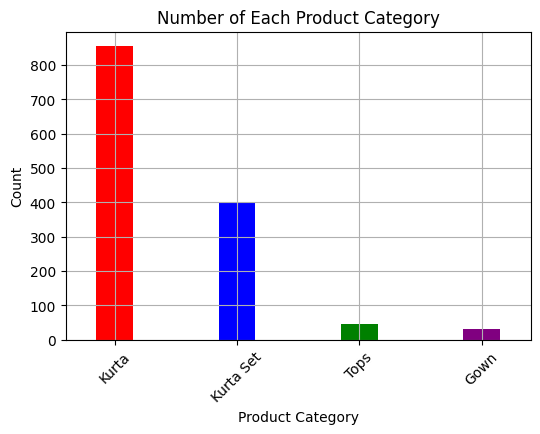

In [47]:
category_counts = may_df['Product_Category'].value_counts()

plt.figure(figsize=(6, 4))
category_counts.plot(kind='bar', color=['red', 'blue', 'green', 'purple'], width=0.3)
plt.title('Number of Each Product Category')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [48]:
kurta_mean_value = round(may_df[may_df['Product_Category'] == 'Kurta']['Final_Old_MRP'].mean(),2)
kurtaSet_mean_value = round(may_df[may_df['Product_Category'] == 'Kurta Set']['Final_Old_MRP'].mean(),2)
Gown_mean_value = round(may_df[may_df['Product_Category'] == 'Gown']['Final_Old_MRP'].mean(),2)
Tops_mean_value = round(may_df[may_df['Product_Category'] == 'Tops']['Final_Old_MRP'].mean(),2)
print(f"The Mean price of Kurta is {kurta_mean_value}. \nThe Mean price of Kurta Set is {kurtaSet_mean_value}. \nThe Mean price of Gowns is {Gown_mean_value}. \nThe Mean price of Tops is {Tops_mean_value}")

The Mean price of Kurta is 2011.32. 
The Mean price of Kurta Set is 2733.12. 
The Mean price of Gowns is 3151.25. 
The Mean price of Tops is 1728.33


In [49]:
mean_values = {}
columns = ['Amazon_MRP', 'Amazon_FBA_MRP', 'Flipkart_MRP',
            'Limeroad_MRP', 'Myntra_MRP', 'Paytm_MRP', 'Snapdeal_MRP']
for column in columns:
    mean_values[column] = round(may_df.groupby('Product_Category')[column].mean(),2)
print(mean_values)

{'Amazon_MRP': Product_Category
Gown         3151.25
Kurta        2029.19
Kurta Set    2735.13
Tops         1750.56
Name: Amazon_MRP, dtype: float64, 'Amazon_FBA_MRP': Product_Category
Gown         3151.25
Kurta        2029.19
Kurta Set    2735.13
Tops         1750.56
Name: Amazon_FBA_MRP, dtype: float64, 'Flipkart_MRP': Product_Category
Gown         3151.25
Kurta        2021.69
Kurta Set    2734.46
Tops         1739.44
Name: Flipkart_MRP, dtype: float64, 'Limeroad_MRP': Product_Category
Gown         3151.25
Kurta        2022.74
Kurta Set    2734.49
Tops         1728.33
Name: Limeroad_MRP, dtype: float64, 'Myntra_MRP': Product_Category
Gown         3151.25
Kurta        2014.09
Kurta Set    2719.96
Tops         1728.56
Name: Myntra_MRP, dtype: float64, 'Paytm_MRP': Product_Category
Gown         3151.25
Kurta        2015.96
Kurta Set    2732.98
Tops         1728.33
Name: Paytm_MRP, dtype: float64, 'Snapdeal_MRP': Product_Category
Gown         3151.25
Kurta        2017.83
Kurta Set    273

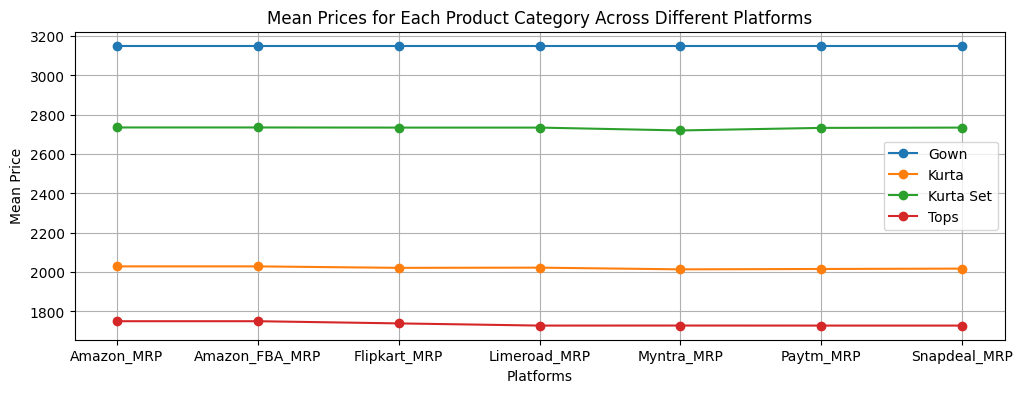

In [50]:
mean_df = pd.DataFrame(mean_values)

plt.figure(figsize=(12, 4))
for category in mean_df.index:
    plt.plot(mean_df.columns, mean_df.loc[category], marker='o', label=category)

plt.title('Mean Prices for Each Product Category Across Different Platforms')
plt.xlabel('Platforms')
plt.ylabel('Mean Price')
plt.legend()
plt.grid(True)
plt.show()

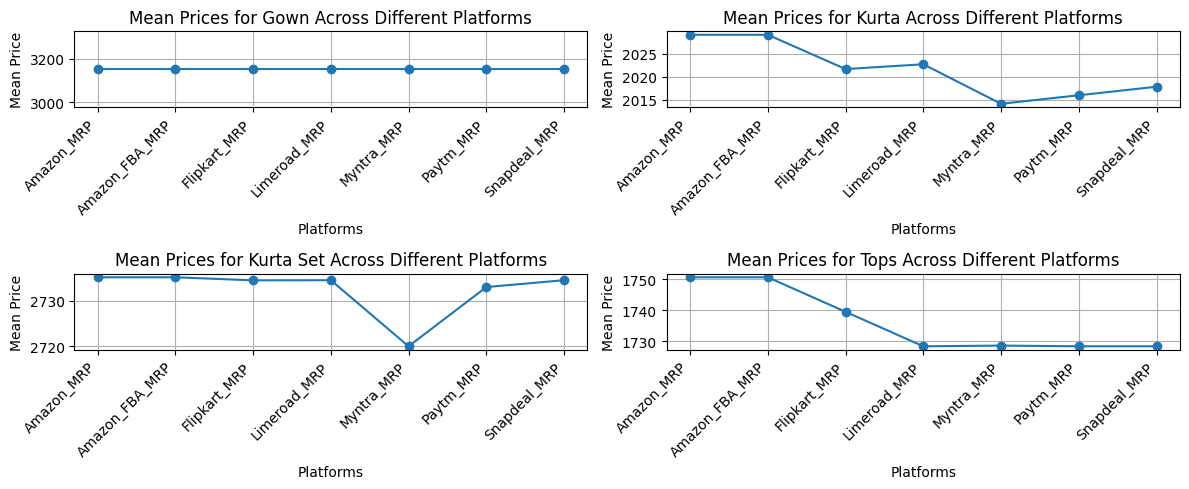

In [56]:
fig, axes = plt.subplots(2, 2, figsize=(12, 5))

categories = mean_df.index
for i, category in enumerate(categories):
    ax = axes[i//2, i%2]
    ax.plot(mean_df.columns, mean_df.loc[category], marker='o')
    ax.set_title(f'Mean Prices for {category} Across Different Platforms')
    ax.set_xlabel('Platforms')
    ax.set_ylabel('Mean Price')
    ax.grid(True)

# Rotate x-axis labels for all subplots
for ax in axes.flat:
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

# P L March 2021

Cleaning

In [58]:
pl_df.replace('Nill', np.nan, inplace=True)
pl_df.replace('#VALUE!', np.nan, inplace=True)
pl_df.rename(columns=lambda x: x.strip(), inplace=True)
pl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   index                   1330 non-null   int64 
 1   Product_SKU             1330 non-null   object
 2   Product_Style_ID        1330 non-null   object
 3   Product_Catalog         1257 non-null   object
 4   Product_Category        1257 non-null   object
 5   Product_Weight          1257 non-null   object
 6   Transfer_Price_Level_1  1324 non-null   object
 7   Transfer_Price_Level_2  1324 non-null   object
 8   Old_MRP                 1293 non-null   object
 9   Final_Old_MRP           1293 non-null   object
 10  Ajio_MRP                1293 non-null   object
 11  Amazon_MRP              1293 non-null   object
 12  Amazon_FBA_MRP          1293 non-null   object
 13  Flipkart_MRP            1293 non-null   object
 14  Limeroad_MRP            1293 non-null   object
 15  Mynt

In [59]:
pl_df.head()

,index,Product_SKU,Product_Style_ID,Product_Catalog,Product_Category,Product_Weight,Transfer_Price_Level_1,Transfer_Price_Level_2,Old_MRP,Final_Old_MRP,Ajio_MRP,Amazon_MRP,Amazon_FBA_MRP,Flipkart_MRP,Limeroad_MRP,Myntra_MRP,Paytm_MRP,Snapdeal_MRP
0,0,Os206_3141_S,Os206_3141,Moments,Kurta,0.3,538,435.78,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
1,1,Os206_3141_M,Os206_3141,Moments,Kurta,0.3,538,435.78,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
2,2,Os206_3141_L,Os206_3141,Moments,Kurta,0.3,538,435.78,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
3,3,Os206_3141_XL,Os206_3141,Moments,Kurta,0.3,538,435.78,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
4,4,Os206_3141_2XL,Os206_3141,Moments,Kurta,0.3,538,435.78,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295


Preprocessing

In [60]:
unique_CatalogforMarch = pl_df['Product_Catalog'].unique()
CatalogforMarch_valuecount = pl_df['Product_Catalog'].value_counts()
CatalogforMarch_nullcount = pl_df['Product_Catalog'].isnull().sum()
print("Unique Product Catalog values:", unique_CatalogforMarch)
print(CatalogforMarch_valuecount)
print("Null values:",CatalogforMarch_nullcount)

Unique Product Catalog values: ['Moments' 'Colors-8' 'Breeze-4' 'Rozana' 'Colors-7' 'Mix' 'Surmaya'
 'Four Gems 2' nan]
Product_Catalog
Mix            830
Surmaya        192
Colors-8        48
Rozana          48
Colors-7        43
Moments         36
Breeze-4        36
Four Gems 2     24
Name: count, dtype: int64
Null values: 73


In [61]:
le_style = LabelEncoder()
le_catalog = LabelEncoder()

pl_df['Product_Style_ID_encoded'] = le_style.fit_transform(pl_df['Product_Style_ID'])
pl_df['Product_Catalog_encoded'] = le_catalog.fit_transform(pl_df['Product_Catalog'].astype(str))

train_data = pl_df[pl_df['Product_Catalog'].notnull()]
test_data = pl_df[pl_df['Product_Catalog'].isnull()]

if not train_data.empty and not test_data.empty:
    X_train = train_data[['Product_Style_ID_encoded']]
    y_train = train_data['Product_Catalog_encoded']
    X_test = test_data[['Product_Style_ID_encoded']]

    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train, y_train)

    predicted_catalogs = knn.predict(X_test)
    predicted_catalogs_decoded = le_catalog.inverse_transform(predicted_catalogs)

    pl_df.loc[pl_df['Product_Catalog'].isnull(), 'Product_Catalog'] = predicted_catalogs_decoded

In [62]:
le_category = LabelEncoder()

pl_df['Product_Category_encoded'] = le_category.fit_transform(pl_df['Product_Category'].astype(str))

train_data = pl_df[pl_df['Product_Category'].notnull()]
test_data = pl_df[pl_df['Product_Category'].isnull()]

if not train_data.empty and not test_data.empty:
    X_train = train_data[['Product_Style_ID_encoded', 'Product_Catalog_encoded']]
    y_train = train_data['Product_Category_encoded']
    X_test = test_data[['Product_Style_ID_encoded', 'Product_Catalog_encoded']]

    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train, y_train)

    predicted_categories = knn.predict(X_test)
    predicted_categories_decoded = le_category.inverse_transform(predicted_categories)

    pl_df.loc[pl_df['Product_Category'].isnull(), 'Product_Category'] = predicted_categories_decoded

In [63]:
weight_mapping = {
    'Gown': 0.4,
    'Kurta Set': 0.4,
    'Kurta': 0.3,
    'Tops': 0.2
}

pl_df['Product_Weight'] = pl_df.apply(
    lambda row: weight_mapping[row['Product_Category']] if pd.isnull(row['Product_Weight']) and row['Product_Category'] in weight_mapping else row['Product_Weight'],
    axis=1
)

In [64]:
pl_df['Transfer_Price_Level_1'] = pd.to_numeric(pl_df['Transfer_Price_Level_1'], errors='coerce')
pl_df['Transfer_Price_Level_2'] = pd.to_numeric(pl_df['Transfer_Price_Level_2'], errors='coerce')
pl_df['Old_MRP'] = pd.to_numeric(pl_df['Old_MRP'], errors='coerce')
pl_df['Final_Old_MRP'] =pd.to_numeric(pl_df['Final_Old_MRP'], errors='coerce')
pl_df['Ajio_MRP'] = pd.to_numeric(pl_df['Ajio_MRP'], errors='coerce')
pl_df['Amazon_MRP'] = pd.to_numeric(pl_df['Amazon_MRP'], errors='coerce')
pl_df['Amazon_FBA_MRP'] = pd.to_numeric(pl_df['Amazon_FBA_MRP'], errors='coerce')
pl_df['Flipkart_MRP'] = pd.to_numeric(pl_df['Flipkart_MRP'], errors='coerce')
pl_df['Limeroad_MRP'] = pd.to_numeric(pl_df['Limeroad_MRP'], errors='coerce')
pl_df['Myntra_MRP'] = pd.to_numeric(pl_df['Myntra_MRP'], errors='coerce')
pl_df['Paytm_MRP'] = pd.to_numeric(pl_df['Paytm_MRP'], errors='coerce')
pl_df['Snapdeal_MRP'] = pd.to_numeric(pl_df['Snapdeal_MRP'], errors='coerce')
pl_df['Product_Weight'] = pd.to_numeric(pl_df['Product_Weight'], errors='coerce')

In [65]:
pl_df['Product_SKU'] = pl_df['Product_SKU'].astype(str)
pl_df['Product_Style_ID'] = pl_df['Product_Style_ID'].astype(str)
pl_df['Product_Catalog'] = pl_df['Product_Catalog'].astype(str)
pl_df['Product_Category'] = pl_df['Product_Category'].astype(str)

In [66]:
train_data = pl_df[pl_df['Transfer_Price_Level_1'].notnull()]
test_data = pl_df[pl_df['Transfer_Price_Level_1'].isnull()]

X_train = train_data[['Product_Style_ID_encoded', 'Product_Catalog_encoded', 'Product_Category_encoded']]
y_train = train_data['Transfer_Price_Level_1']
X_test = test_data[['Product_Style_ID_encoded', 'Product_Catalog_encoded', 'Product_Category_encoded']]

knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)

predicted_transferprice = knn.predict(X_test)

pl_df.loc[pl_df['Transfer_Price_Level_1'].isnull(), 'Transfer_Price_Level_1'] = predicted_transferprice

In [67]:
train_data = pl_df[pl_df['Transfer_Price_Level_2'].notnull()]
test_data = pl_df[pl_df['Transfer_Price_Level_2'].isnull()]

X_train = train_data[['Product_Style_ID_encoded', 'Product_Catalog_encoded', 'Product_Category_encoded']]
y_train = train_data['Transfer_Price_Level_2']
X_test = test_data[['Product_Style_ID_encoded', 'Product_Catalog_encoded', 'Product_Category_encoded']]

knn.fit(X_train, y_train)

predicted_transferprice = knn.predict(X_test)

pl_df.loc[pl_df['Transfer_Price_Level_2'].isnull(), 'Transfer_Price_Level_2'] = predicted_transferprice

In [68]:
columns_to_fill = ['Old_MRP', 'Final_Old_MRP', 'Ajio_MRP',
                   'Amazon_MRP', 'Amazon_FBA_MRP', 'Flipkart_MRP',
                   'Limeroad_MRP', 'Myntra_MRP', 'Paytm_MRP', 'Snapdeal_MRP']

for column in columns_to_fill:
    train_data = pl_df[pl_df[column].notnull()]
    test_data = pl_df[pl_df[column].isnull()]

    if not train_data.empty and not test_data.empty:
        X_train = train_data[['Product_Style_ID_encoded', 'Product_Category_encoded', 'Transfer_Price_Level_1', 'Transfer_Price_Level_2']]
        y_train = train_data[column]
        X_test = test_data[['Product_Style_ID_encoded', 'Product_Category_encoded', 'Transfer_Price_Level_1', 'Transfer_Price_Level_2']]

        knn = KNeighborsRegressor(n_neighbors=3)
        knn.fit(X_train, y_train)

        predicted_values = knn.predict(X_test)

        pl_df.loc[pl_df[column].isnull(), column] = predicted_values


pl_df.drop(columns=['Product_Style_ID_encoded', 'Product_Category_encoded', 'Product_Catalog_encoded'], inplace=True)

In [69]:
pl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   index                   1330 non-null   int64  
 1   Product_SKU             1330 non-null   object 
 2   Product_Style_ID        1330 non-null   object 
 3   Product_Catalog         1330 non-null   object 
 4   Product_Category        1330 non-null   object 
 5   Product_Weight          1330 non-null   float64
 6   Transfer_Price_Level_1  1330 non-null   float64
 7   Transfer_Price_Level_2  1330 non-null   float64
 8   Old_MRP                 1330 non-null   float64
 9   Final_Old_MRP           1330 non-null   float64
 10  Ajio_MRP                1330 non-null   float64
 11  Amazon_MRP              1330 non-null   float64
 12  Amazon_FBA_MRP          1330 non-null   float64
 13  Flipkart_MRP            1330 non-null   float64
 14  Limeroad_MRP            1330 non-null   

Analysing

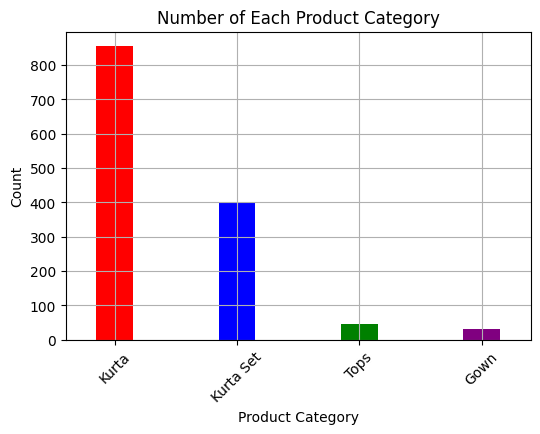

In [70]:
category_counts = pl_df['Product_Category'].value_counts()

plt.figure(figsize=(6, 4))
category_counts.plot(kind='bar', color=['red', 'blue', 'green', 'purple'], width=0.3)
plt.title('Number of Each Product Category')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [71]:
mean_values1 = {}
columns = ['Amazon_MRP', 'Amazon_FBA_MRP', 'Flipkart_MRP',
            'Limeroad_MRP', 'Myntra_MRP', 'Paytm_MRP', 'Snapdeal_MRP']
for column in columns:
    mean_values1[column] = round(pl_df.groupby('Product_Category')[column].mean(),2)
print(mean_values1)

{'Amazon_MRP': Product_Category
Gown         3151.25
Kurta        2025.69
Kurta Set    2735.13
Tops         1750.56
Name: Amazon_MRP, dtype: float64, 'Amazon_FBA_MRP': Product_Category
Gown         3151.25
Kurta        2025.69
Kurta Set    2735.13
Tops         1750.56
Name: Amazon_FBA_MRP, dtype: float64, 'Flipkart_MRP': Product_Category
Gown         3151.25
Kurta        2018.19
Kurta Set    2734.46
Tops         1739.44
Name: Flipkart_MRP, dtype: float64, 'Limeroad_MRP': Product_Category
Gown         3151.25
Kurta        2019.24
Kurta Set    2734.49
Tops         1728.33
Name: Limeroad_MRP, dtype: float64, 'Myntra_MRP': Product_Category
Gown         3151.25
Kurta        2010.59
Kurta Set    2719.96
Tops         1728.56
Name: Myntra_MRP, dtype: float64, 'Paytm_MRP': Product_Category
Gown         3151.25
Kurta        2012.46
Kurta Set    2732.98
Tops         1728.33
Name: Paytm_MRP, dtype: float64, 'Snapdeal_MRP': Product_Category
Gown         3151.25
Kurta        2014.33
Kurta Set    273

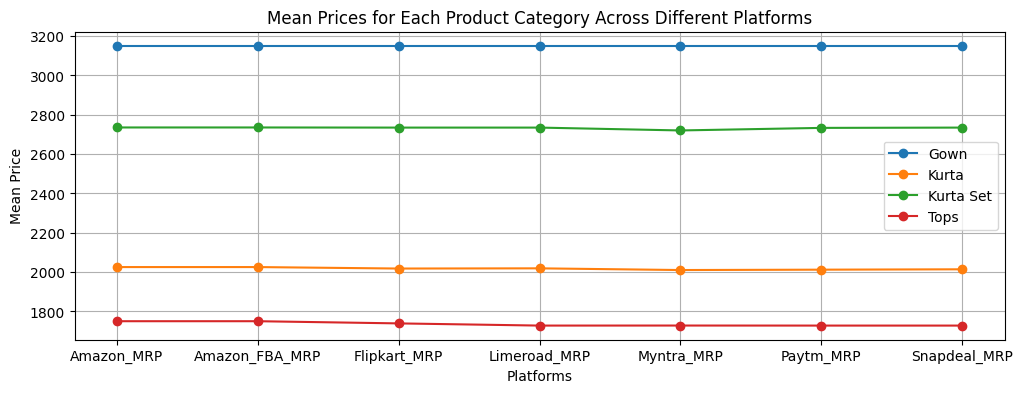

In [72]:
mean_ds = pd.DataFrame(mean_values1)

plt.figure(figsize=(12, 4))
for category in mean_ds.index:
    plt.plot(mean_ds.columns, mean_ds.loc[category], marker='o', label=category)

plt.title('Mean Prices for Each Product Category Across Different Platforms')
plt.xlabel('Platforms')
plt.ylabel('Mean Price')
plt.legend()
plt.grid(True)
plt.show()

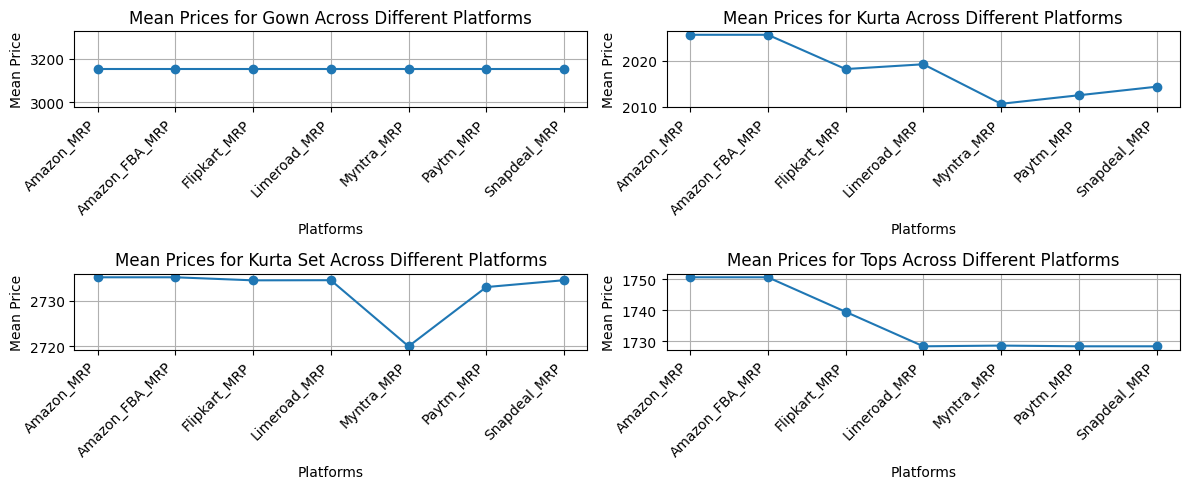

In [74]:
fig, axes = plt.subplots(2, 2, figsize=(12, 5))

categories = mean_ds.index
for i, category in enumerate(categories):
    ax = axes[i//2, i%2]
    ax.plot(mean_ds.columns, mean_ds.loc[category], marker='o')
    ax.set_title(f'Mean Prices for {category} Across Different Platforms')
    ax.set_xlabel('Platforms')
    ax.set_ylabel('Mean Price')
    ax.grid(True)

for ax in axes.flat:
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')
    
plt.tight_layout()
plt.show()

# EXPENSE IIGF & SALES REPORT (DEEPRAJ BASU)